# Projeto 2 - Ciência dos Dados

## Engenharia 2A


### Gustavo Pinheiro de Carvalho
### Celina Vieira de Melo
### Gabriel Penna de Lima
### Maria Eduarda Mourão

# Descrição do projeto

Nesse projeto, devemos realizar a predição de uma variável principal, chamada de variável TARGET, em função de outras variáveis, chamadas de FEATURES, que podem influenciar em seu comportamento.

Para o desenvolvimento da nossa base de dados, criamos um Google Forms com algumas perguntas que nos ajudariam a desenvolver a análise da variável principal. 

Decidimos pegar informações básicas para conseguir um maior número de adeptos a pesquisa, pois acreditamos que quando o formulário é muito extenso e demanda muito tempo para ser preenchido, alguns participantes acabam desistindo.

Dessa forma, chegamos a nossa base de dados:

# <font color='blue'>Base de Dados: Pesquisa sobre a prática de atividades físicas</font> 

   A base de dados `"Pesquisa.xlsx"` agrupa todas as respostas dos participantes da pesquisa que realizamos, de forma que nela consta: 

Carimbo de data/hora;

Nome (OPCIONAL);

Idade;

Sexo;

Você se considera uma pessoa fisicamente ativa?;

Quantos MINUTOS de atividade física você faz durante a SEMANA?;

A pandemia influenciou a sua prática de atividades físicas?;

O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?;

Você sente a vontade de realizar atividades físicas em maior frequência?.

## Análise dos dados

In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D


from scipy import stats

In [2]:
print(os.getcwd())

/Users/gustavopinheiro/P2-CD21-1


In [3]:
dados = pd.read_excel('Pesquisa.xlsx')
dados

,Carimbo de data/hora,Nome\n,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,2021-05-20 10:15:08.814,Gabrielle,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,2021-05-20 10:15:47.122,Felipe Defendi,17,Masculino,Talvez,30,Não,Outros,Sim
2,2021-05-20 10:18:40.453,Davi Bonsi,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,2021-05-20 10:20:29.293,Isabela Domingues,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,2021-05-20 10:20:57.775,Paola Gragnolati Fernandes,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...,...,...
165,2021-05-21 10:41:20.303,Zuleika Syudart de lucena feitosa,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,2021-05-21 10:51:12.881,Daniela,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,2021-05-21 13:07:05.650,Ticiana Hissa,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,2021-05-21 13:14:57.503,NaN,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


### Carimbo de data/hora

Para a análise do nosso problema, julgamos que essa coluna não possui nenhuma relação com o objetivo que estamos buscando, portanto, resolvemos tira-lá.

In [4]:
dados = dados.drop(columns=['Carimbo de data/hora'])
dados

,Nome\n,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,Gabrielle,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,Felipe Defendi,17,Masculino,Talvez,30,Não,Outros,Sim
2,Davi Bonsi,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,Isabela Domingues,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,Paola Gragnolati Fernandes,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...,...
165,Zuleika Syudart de lucena feitosa,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,Daniela,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,Ticiana Hissa,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,NaN,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


### Nome

Para a análise do nosso problema, julgamos que essa coluna não possui nenhuma relação com o objetivo que estamos buscando, portanto, resolvemos tira-lá.

In [5]:
dados = dados.drop(columns=['Nome\n'])
dados

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,17,Masculino,Talvez,30,Não,Outros,Sim
2,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...
165,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


### Idade

Para fazer a análise da idade das amostras contidas nos dados, decidimos analisar quais as idades que mais aparecem no nosso dataset, a média dessas idades e a distribuição delas.

Text(0.5, 1.0, 'Distribuição das Idades dos participantes')

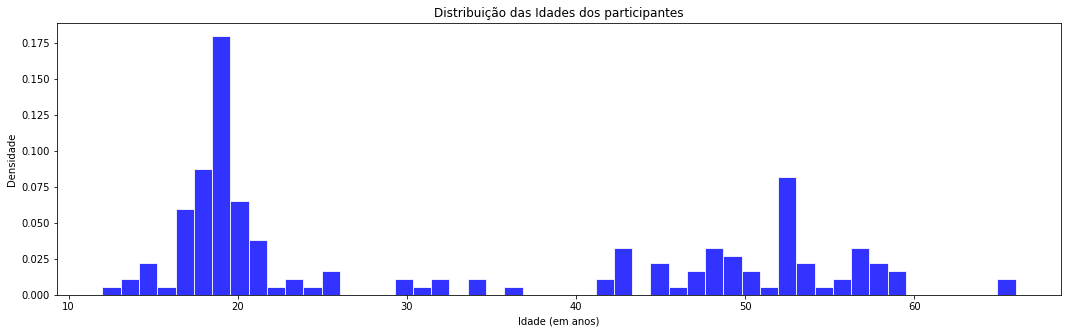

In [6]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Idade'], bins=50, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Idade (em anos)')
plt.title('Distribuição das Idades dos participantes')

In [7]:
dados.Idade.describe()

count    170.000000
mean      32.523529
std       16.190509
min       12.000000
25%       19.000000
50%       21.000000
75%       49.000000
max       66.000000
Name: Idade, dtype: float64

Pela análise da distribuição das idades dos participantes da pesquisa, podemos aferir que existe uma maior concentração de amostras com idades próximas de 19 anos, que pode ser justificado pelo maior alcance que temos no público dessa idade.

Porém, obtivemos respostas de pessoas de diferentes idades, e por isso podemos repartir os nossos dados segundo faixas etárias para fazer uma análise focada especialmente em alguma dessas faixas.

#### Idade X Quantos MINUTOS de atividade física você faz durante a SEMANA

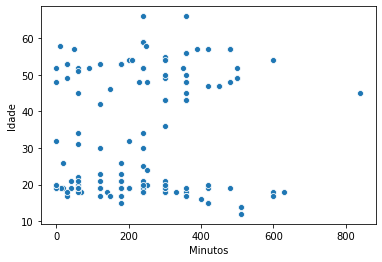

In [29]:
sns.scatterplot(dados['Minutos'], dados['Idade'])

### Sexo

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [8]:
dados.Sexo.value_counts(True)

Feminino     0.564706
Masculino    0.429412
Outro        0.005882
Name: Sexo, dtype: float64

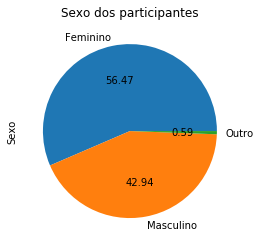

In [9]:
sexo = dados.Sexo.value_counts()
sexo.plot(kind='pie', title='Sexo dos participantes', autopct="%.2f")

In [ ]:
#### Quantos MINUTOS de atividade física você faz durante a SEMANA X Sexo MASCULINO

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

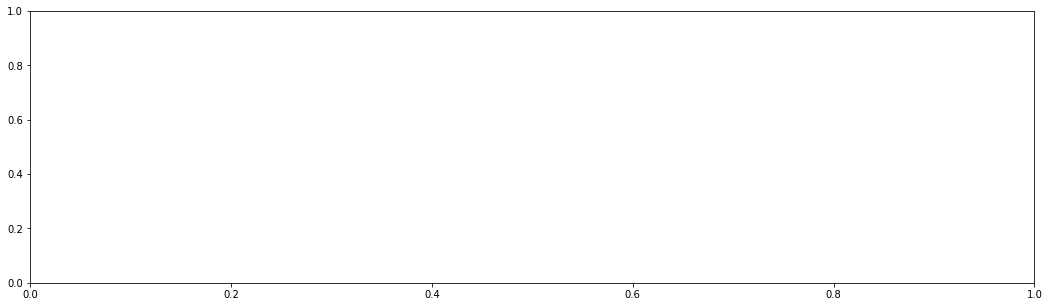

In [31]:
masculino = dados.loc[]

plt.figure(figsize=(18, 5))
plt.hist(dados['Sexo']=='Masculino', bins=50, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Idade (em anos)')
plt.title('Distribuição das Idades dos participantes')

In [ ]:
#### Quantos MINUTOS de atividade física você faz durante a SEMANA X Sexo FEMININO

### Você se considera uma pessoa fisicamente ativa?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa. Pórem, nesse caso, seremos capazes de analisar o que as pessoas julgam ser "uma pessoa fisicamente ativa", nos dando a possibilidade de observar nos dados as pessoas que realmente são fisicamente ativas e as que não são.

In [10]:
dados.Ativa.value_counts(True)

Sim       0.676471
Não       0.241176
Talvez    0.082353
Name: Ativa, dtype: float64

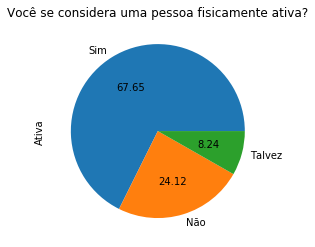

In [11]:
ativa = dados.Ativa.value_counts()
ativa.plot(kind='pie', title='Você se considera uma pessoa fisicamente ativa?', autopct="%.2f")

### Quantos MINUTOS de atividade física você faz durante a SEMANA?

Para fazer a análise do tempo destinado a atividades físicas por semana das amostras contidas nos dados, decidimos analisar quais os tempos que mais aparecem no nosso dataset, a média dessas tempos e a distribuição deles.

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

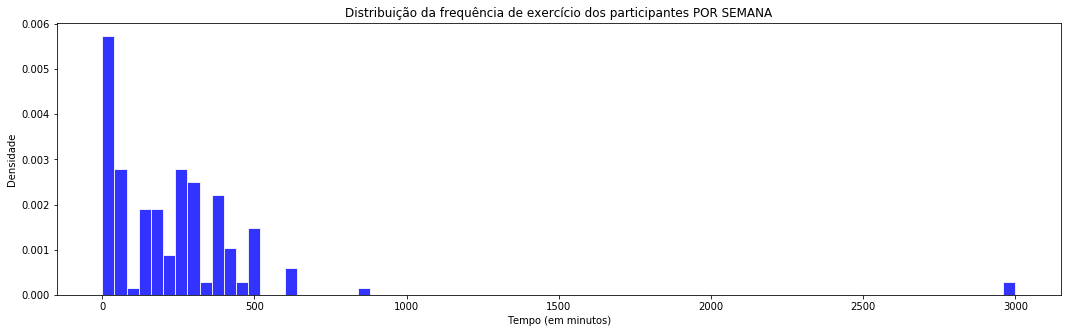

In [12]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')
#plt.ylim(0,0.35)

#### Dados menores que 10:

Pela análise dos dados, percebemos que essa pergunta teve um grau de dificuldade de interpretação baseado nas respostas que obtivemos, pois acreditamos que algumas amostras apresentam parâmetros diferentes do que haviamos perguntando, como VEZES que realiza exercícios durante a semana ou HORAS que realiza exercícios durante a semana.

Considerando esses possíveis erros de interpretação, decidimos contabilizar apenas os dados que apresentam um número maior que 10 minutos de exercícios físicos por semana, incluindo também as amostras que apresentaram o número 0, pois independente da interpretação, a pergunta receberia a mesma resposta.

In [13]:
#y = dados.loc[dados['Minutos'] > 0 & dados['Minutos'] < 10, :]
menor_10_diferente_0 = dados.loc[(dados['Minutos']<10) & (dados['Minutos']!=0)]
menor_10_diferente_0
#dados = dados.drop(y)
#dados = dados.drop(dados[dados['Minutos'] > 0  dados['Minutos'] < 10].index)

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
13,20,Masculino,Sim,5,Sim,Outros,Sim
39,18,Feminino,Não,2,Sim,Outros,Não
44,15,Feminino,Sim,8,Sim,Comecei a fazer exercícios em casa,Talvez
46,50,Masculino,Sim,9,Sim,Comecei a fazer exercícios em casa,Não
51,19,Masculino,Não,5,Sim,Fiquei dependente à reabertura das academias,Sim
53,17,Feminino,Sim,3,Não,Fiquei dependente à reabertura das academias,Sim
54,19,Masculino,Sim,8,Sim,Comecei a fazer exercícios em casa,Sim
58,18,Feminino,Sim,7,Sim,Comecei a fazer exercícios em casa,Não
76,20,Feminino,Sim,5,Sim,Comecei a fazer exercícios em casa,Talvez
82,19,Masculino,Não,5,Sim,Fiquei dependente à reabertura das academias,Sim


In [14]:
#dados_limpo = dados.drop(menor_10_diferente_0.index)
#dados_limpo
dados = dados.drop(menor_10_diferente_0.index)
#dados

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

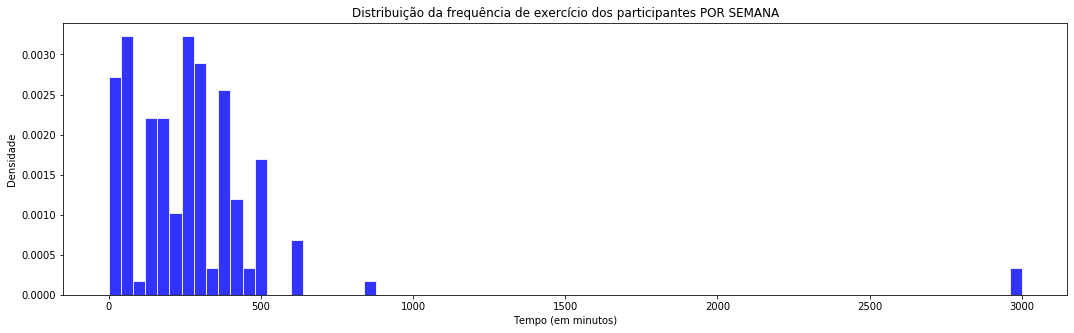

In [15]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')

#### OUTRO RACIOCÍNIO, MAS NÃO USADO

In [16]:
minutos_menor_7 = dados['Minutos'] < 7
sim = dados['Ativa'] == 'Sim'

In [17]:
menor_7_sim = dados.loc[minutos_menor_7 & sim, :]
menor_7_sim

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade


In [18]:
x = menor_7_sim.Minutos*60
x

Series([], Name: Minutos, dtype: int64)

In [19]:
menor_7_sim = dados.loc[minutos_menor_7 & sim, :]
menor_7_sim

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade


#### Valores aberrantes:

Pela análise do histograma, podemos perceber a existência de um valor aberrante, e quando fomos analisá-lo, descobrimos que ele poderia ser um erro nas respostas do formulário, pois representa uma média de 7,14 horas por dia, algo humanamente impróvavel.

In [20]:
dados = dados.drop(dados[dados['Minutos'] > 1000].index)

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

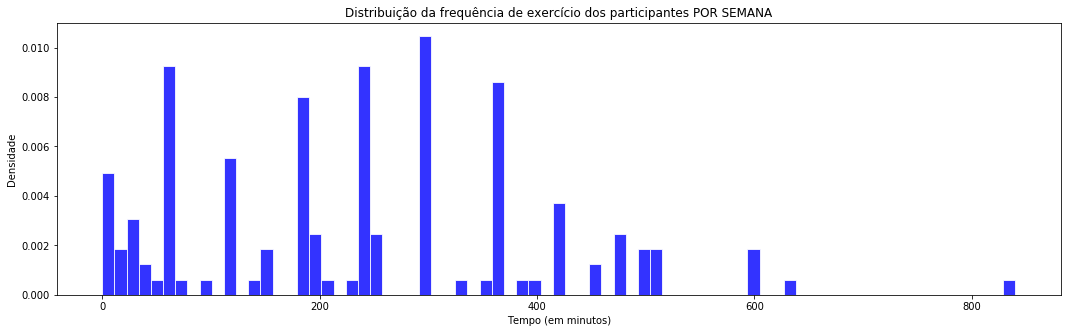

In [21]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')

#### Descrição da variável

In [22]:
dados.Minutos.describe()

count    145.000000
mean     237.951724
std      163.763902
min        0.000000
25%      120.000000
50%      240.000000
75%      360.000000
max      840.000000
Name: Minutos, dtype: float64

Realizando uma análise dos resultados, podemos perceber que obtivemos uma média de aproximadamente 206.16 minutos de exercícios por semana, com a 

### A pandemia influenciou a sua prática de atividades físicas?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [23]:
dados.Influenciou.value_counts(True)

Sim    0.77931
Não    0.22069
Name: Influenciou, dtype: float64

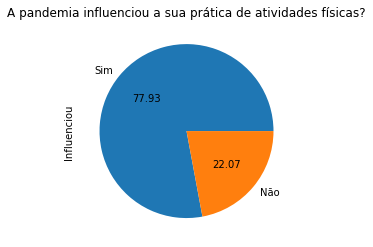

In [24]:
influenciou = dados.Influenciou.value_counts()
influenciou.plot(kind='pie', title='A pandemia influenciou a sua prática de atividades físicas?', autopct="%.2f")

### O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [25]:
dados.Superar.value_counts(True)

Comecei a fazer exercícios em casa                                 0.544828
Outros                                                             0.165517
Dei preferência a atividades individuais                           0.124138
Fiquei dependente à reabertura das academias                       0.096552
Consegui continuar com o mesmo plano de exercícios que já tinha    0.068966
Name: Superar, dtype: float64

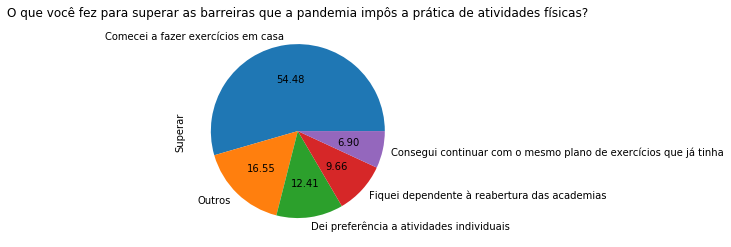

In [26]:
superar = dados.Superar.value_counts()
superar.plot(kind='pie', title='O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?', autopct="%.2f")

### Você sente a vontade de realizar atividades físicas em maior frequência?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [27]:
dados.Vontade.value_counts(True)

Sim       0.737931
Talvez    0.137931
Não       0.124138
Name: Vontade, dtype: float64

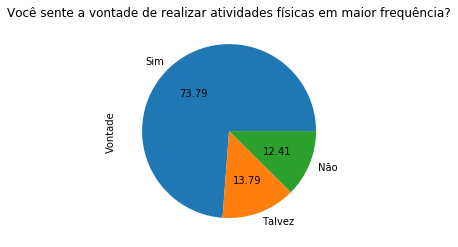

In [28]:
vontade = dados.Vontade.value_counts()
vontade.plot(kind='pie', title='Você sente a vontade de realizar atividades físicas em maior frequência?', autopct="%.2f")